# VISIONS'18:  Tucker trawl 2018-07-21

Cruise number: RR1812 (R/V Roger Revelle)

This notebook shows an estimation of where the time-depth trajectory of the Tucker trawl tow on 2018-07-21 was with respect to the animals in the water column (observed through ADCP).

## Loading ADCP raw beam data
First let's load in some libraries we will need to read and plot the data.

In [70]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
import arlpy   # ARL underwater acoustics toolbox
from mpl_toolkits.axes_grid1 import make_axes_locatable

# sys.path.append('/Users/wujung/adcpcode/programs')
from pycurrents.adcp.rdiraw import Multiread
import adcp_func

Find out what are the available ADCP raw files.

In [47]:
# Set up paths and params
pname_150 = '/Volumes/current_cruise/adcp/RR1812/raw/os150/'
fname_150 = glob.glob(pname_150+'rr2018_202*.raw')
fname_150.sort()   # sort filename
fname_150

['/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_03070.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_07200.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_14400.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_21600.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_28800.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_36000.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_43200.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_50400.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_57600.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_64800.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_72000.raw',
 '/Volumes/current_cruise/adcp/RR1812/raw/os150/rr2018_202_79200.raw']

It's a bit of a guess work to figure out which files contain the section during the net tow.

We know the last number string in the filename are the number of seconds since 00:00 of the day. The net tow was in water around 03:26 UTC time = 12360 secs. This means files `rr2018_202_07200.raw` and `rr2018_202_14400.raw` should cover the section of the net tow.

Let's give it a try!

In [67]:
m_150,data_150,param_150 = adcp_func.load_raw_files([pname_150+'rr2018_202_07200.raw',pname_150+'rr2018_202_14400.raw'])

Loading files... (os150.0)
  rr2018_202_07200.raw
  rr2018_202_14400.raw


Next we grab the time stamp from the ADCP raw data stream.

In [68]:
# set up x-axis (time stamp) for ADCP data
ping_jump_150 = int(np.floor(data_150.dday.shape[0]/8))
ping_num_150 = np.arange(0,data_150.amp1.shape[0],ping_jump_150)
time_str_150 = [str('%02d'%data_150.rVL['Hour'][x])+':'+str('%02d'%data_150.rVL['Minute'][x]) for x in ping_num_150]

Let's plot and check if the data make sense.

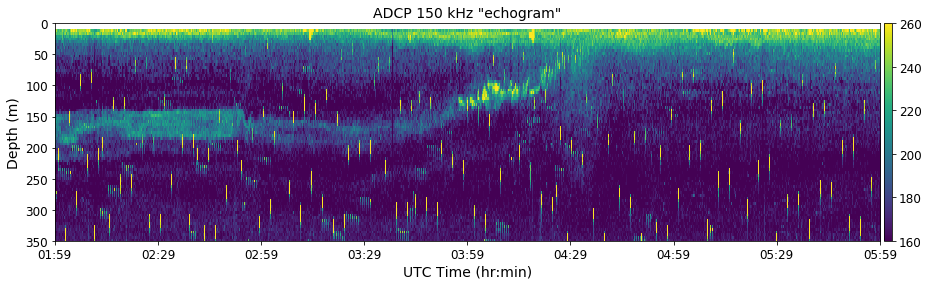

In [69]:
val_mtx = data_150.amp1-param_150['absorption']-2*param_150['spreading_loss']
actual_depth_bin = np.round(param_150['range'],2)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(val_mtx.T,aspect='auto',interpolation='none',\
               extent=[0,val_mtx.shape[0],actual_depth_bin[-1],actual_depth_bin[0]],\
               vmin=160, vmax=260)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.05)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=12)
ax.set_xticks(ping_num_150)
ax.set_xticklabels(time_str_150,fontsize=12)
ax.set_xlabel('UTC Time (hr:min)',fontsize=14)
ax.set_yticklabels(np.arange(0,400,50),fontsize=12)
ax.set_ylabel('Depth (m)',fontsize=14)
ax.set_ylim([350,0])
ax.set_title('ADCP 150 kHz "echogram"',fontsize=14)
plt.show()

We can see a strong diel vertical migration (DVM) signal starting around 04:00 UTC time, which is about 19:00 local time, so the ADCP echogram makes sense. The Tucker trawl was in water during 03:26-04:13 UTC time, right around when the DVM happened.

## Loading net time-depth trajectory

Let's now try putting the net tow time-depth trajectory onto the echogram to see which were the layers we actually sampled.